###  Rosenblatt's Algorithm

In [5]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [7]:
# load the boston housing dataset
boston = datasets.load_boston()

In [40]:
# construct the dataframe
x = pd.DataFrame(boston.data)
x.columns = boston.feature_names
y=pd.DataFrame(boston.target)
y.columns=['MEDV']
data = pd.concat([x,y], axis=1)

In [5]:
# check the top rows
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [42]:
# Create a boolean indicator of whether MEDV is greater than 40
data['HighPriced'] = data['MEDV'] > 40
data['HighPriced'].dtypes

dtype('bool')

In [7]:
# check the top rows
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,HighPriced
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,False


In [8]:
# Show that this variable is linearly separable across the MEDV and RM variables 
# by plotting in a two dimensional space.

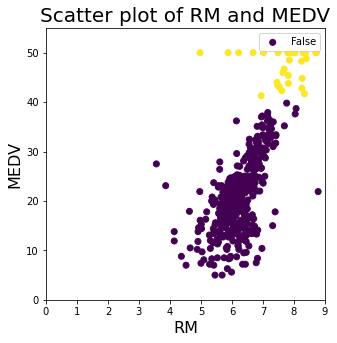

In [9]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(data['RM'], data['MEDV'], c = data['HighPriced'])
plt.xlabel('RM', fontsize=16)
plt.ylabel('MEDV', fontsize=16)
plt.title('Scatter plot of RM and MEDV', fontsize = 20)
plt.ylim(0., 55.0)
plt.xlim(0., 9.0)
plt.legend(data['HighPriced'])
plt.show()

The purple dots represent 'false' in HighPriced, and the yellow dots represent 'true' in Highpriced.\
Purple dots and yellow dots can be linearly separated since it is possible to draw a linear line to separate those dots into the purple and yellow groups.

In [10]:
# create a x matrix to store RM and MEDV
cols = ['RM','MEDV']
x = data[cols].to_numpy()
type(x)

numpy.ndarray

In [11]:
# show the shape of x
x.shape

(506, 2)

In [12]:
# createa a vector to store the HighPriced feature
y = data['HighPriced'].to_numpy()
y = 1* y # convert boolean values to 1 and 0

In [13]:
# show the shape of y
y.shape

(506,)

In [14]:
# create a bias array (bias = 1)
bias = np.ones(len(y))

In [15]:
# combine the bias array into the x matrix
x = np.c_[bias,x]

In [16]:
# show the top 5 rows of matrix x
x[:5]

array([[ 1.   ,  6.575, 24.   ],
       [ 1.   ,  6.421, 21.6  ],
       [ 1.   ,  7.185, 34.7  ],
       [ 1.   ,  6.998, 33.4  ],
       [ 1.   ,  7.147, 36.2  ]])

In [17]:
# set the step size
step = 0.01

In [18]:
# intialize a vector of weights
# np.random.rand will generate random numbers between 0 and 1
weights = np.random.rand(x.shape[1])

In [19]:
# show step size
step

0.01

In [20]:
# show starting weights
weights

array([0.52255297, 0.93989783, 0.67365605])

In [21]:
# Create a function called myPerceptron
def myPerceptron(x, y, weights, stepsize):
    dot = np.dot(x,weights)
    mis = 0
    updated_weights = weights
    for i in range(y.shape[0]):
        if dot[i] >=0:
            ypred = 1
        else:
            ypred = 0
        if ypred != y[i]:
            mis = mis + 1
            updated_weights = stepsize*(y[i]-ypred)*x[i] + weights
        else: 
            continue
    return updated_weights, mis

In [22]:
# set step size
step = 0.01
# initialization
weights = np.random.rand(x.shape[1])
mis = 100
list_mis = []
list_iteration = []
num_iteration = 0
# run the iteration untill mis = 0
while mis >0:   
    weights_new = weights.copy()
    weights, mis = myPerceptron(x, y, weights_new, step)
    num_iteration = num_iteration + 1
    list_iteration.append(num_iteration)
    list_mis.append(mis)
print('Number of iterations: ', len(list_iteration))

Number of iterations:  13404


In [25]:
len(list_mis)

13404

In [49]:
list_mis[13403]

0

In [344]:
print('Weights when converged: ', weights)

Weights when converged:  [-34.03977488  -2.57839703   1.3359341 ]


#### Number of iterations function took to converge.
13,404

In [32]:
# plot the number of errors for each iteration vs the iteration number
# create a dataframe
df = pd.DataFrame(
    {'Number_iterations': list_iteration,
     'Number_errors': list_mis})
df.head(3)

,Number_iterations,Number_errors
0,1,475
1,2,475
2,3,500


In [33]:
df.tail(3)

,Number_iterations,Number_errors
13401,13402,12
13402,13403,37
13403,13404,0


Text(0.5, 1.0, 'Plot of number of iterations and errors')

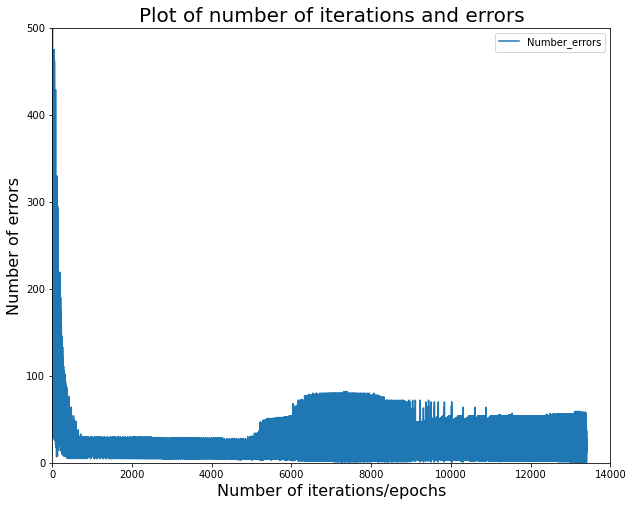

In [34]:
# plot
plt.rcParams["figure.figsize"] = (10,8)
df.plot(x ='Number_iterations', y='Number_errors', kind = 'line')
plt.ylim(0., 500)
plt.xlim(0., 14000)
plt.xlabel('Number of iterations/epochs', fontsize=16)
plt.ylabel('Number of errors', fontsize=16)
plt.title('Plot of number of iterations and errors', fontsize = 20)

#### Findings

The line drops dramatically when the number of iterations reach around 600. After 5,000 times of iterations, the number of errors fluctuated around 100. When the number of iterations come to 13214, the number of errors drops to 0.

#### Superimpose the separation line

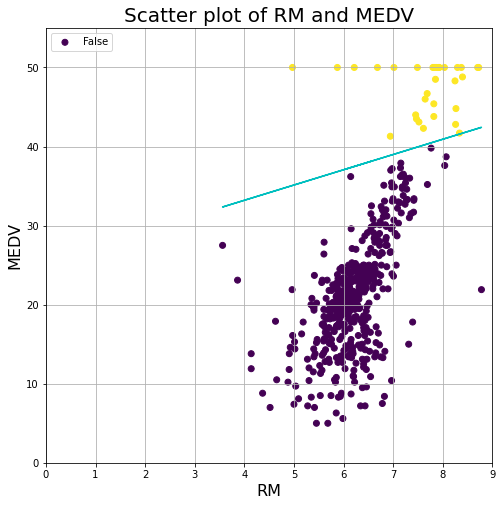

In [376]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(data['RM'], data['MEDV'], c = data['HighPriced'])
plt.xlabel('RM', fontsize=16)
plt.ylabel('MEDV', fontsize=16)
plt.title('Scatter plot of RM and MEDV', fontsize = 20)
plt.ylim(0., 55.0)
plt.xlim(0., 9.0)
plt.legend(data['HighPriced'],loc='upper left')
plt.plot(data['RM'], -1*weights[0]/weights[2] - (weights[1]/weights[2])*data['RM'] ,'-c', label='Separation line')
plt.grid()
plt.show()

The separation line draw from the results of iteration has a positive slope, pointing up to the upper right corner. 
This line successfully separate purple dots and yellow dots (representing highpriced observations).

But if we are to draw a separation line manually without iterations, we probably will come up with a horizontal line since the yellow dots are above 40 in the y axis.